<a href="https://www.kaggle.com/code/theyazilimci/top-hits-spotify-analysis-python?scriptVersionId=99242675" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🔝 Top Hits Spotify Analysis Python 🎤

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 In this notebook we are going to analyse tops hits music on Spotify from 2000 to 2019.To do it i am going to use different python libraries such as seaborn and matplotlib.There are useful information and columns that we'll analyse and try to undersant the result of it.
</div>


![image](https://developer.spotify.com/assets/branding-guidelines/logo@2x.png)

# Used Library 📖 <br>
We'll use basic python libraries
*  Numpy link: https://numpy.org
*  Pandas link: https://pandas.pydata.org
*  Matplotlib link: https://matplotlib.org
*  Plotly link: https://plotly.com
<hr>

In [1]:
import matplotlib.pyplot as plt 
import plotly as py
import pandas as pd
import numpy as np 
import plotly.express as px
import math 
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv('../input/top-hits-spotify-from-20002019/songs_normalize.csv')

In [3]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### How Many Artist are there 

In [4]:
len(df.artist.unique())

835

### Get the first five artist with the most registration

<AxesSubplot:>

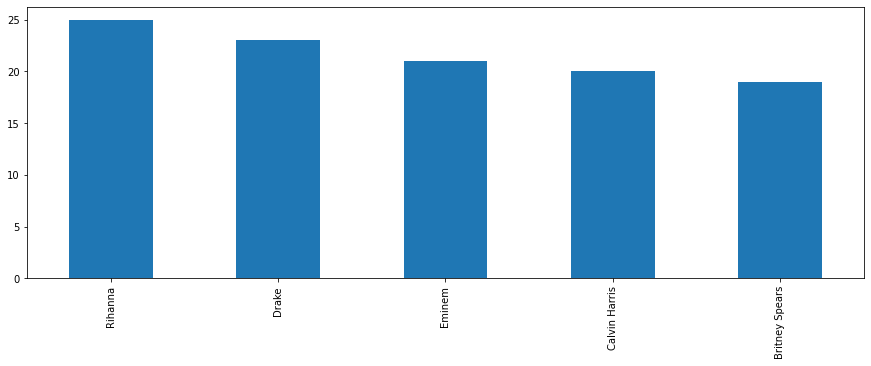

In [5]:
plt.figure(figsize=(15,5))
df.artist.value_counts().head().plot.bar()

### Focus on Rihanna

<div>
<img src="https://pbs.twimg.com/media/FSaQ1ThUcAAqz5k.jpg" width="300"/>
</div>

In [6]:
rihanna_df = df[df['artist'] == 'Rihanna']
rihanna_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
503,Rihanna,Pon de Replay,246960,False,2005,77,0.779,0.640,7,-8.415,1,0.1590,0.000155,0.000770,0.1010,0.498,99.019,"hip hop, pop, R&B"
605,Rihanna,SOS,238920,False,2006,73,0.677,0.671,7,-4.905,1,0.0361,0.004000,0.000051,0.4130,0.527,137.046,"hip hop, pop, R&B"
648,Rihanna,Unfaithful,226973,False,2006,70,0.588,0.391,0,-8.607,0,0.0334,0.839000,0.000000,0.2270,0.349,144.069,"hip hop, pop, R&B"
701,Rihanna,Umbrella,275986,False,2008,81,0.583,0.829,1,-4.603,1,0.1340,0.008640,0.000000,0.0426,0.575,174.028,"hip hop, pop, R&B"
726,Rihanna,Shut Up And Drive,212280,False,2008,69,0.735,0.826,1,-4.902,1,0.0349,0.001010,0.129000,0.1970,0.740,132.964,"hip hop, pop, R&B"


### How Many Song did she have

In [7]:
len(rihanna_df.song.unique())

23

### Get the popularity and number of song per year (each block represent one music)

In [8]:
fig = px.bar(rihanna_df, x='year', y='popularity',title = 'Total Popularity of song by year')
fig.show()

### Sum of Popularity

In [9]:
px.histogram(rihanna_df, x="year", y="popularity",
                   hover_data=rihanna_df.columns)

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 She's best music released in 2008, this may be the year of her ascension
</div>

### Her first five Best Music 🥇

In [10]:
rihanna_df = rihanna_df.sort_values('popularity',ascending=False)
rihanna_df[['song','year','popularity','genre']].head()

,song,year,popularity,genre
701,Umbrella,2008,81,"hip hop, pop, R&B"
1636,Needed Me,2016,80,"hip hop, pop, R&B"
819,Don't Stop The Music,2008,77,"hip hop, pop, R&B"
503,Pon de Replay,2005,77,"hip hop, pop, R&B"
811,Disturbia,2008,76,"hip hop, pop, R&B"


### Compare she's best music with the best music of the whole dataset

In [11]:
max_popularity = df[df.popularity == max(df.popularity)]
max_popularity[['artist','song','year','popularity','genre']]

,artist,song,year,popularity,genre
1322,The Neighbourhood,Sweater Weather,2013,89,"rock, pop"


<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 This result dont tell us too much we may want to see the best music in the same genre which is hip hop,pop,R&B
</div>

In [12]:
max_popularity = df[df.genre == 'hip hop, pop, R&B']
max_popularity.sort_values('popularity',ascending=False).head(1)[['artist','song','year','popularity','genre']]

,artist,song,year,popularity,genre
1601,Drake,One Dance,2016,84,"hip hop, pop, R&B"


<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 We can see drake that surpass rihanna in 2016 with the song One Dance and a popularity of 84 however the date of released isn't the same so lets look at 2008
</div>

### Check the best music in 2008 

In [13]:
max_popularity = df[(df.genre == 'hip hop, pop, R&B') & (df.year == 2008)]
max_popularity.sort_values('popularity',ascending=False).head(1)[['artist','song','year','popularity','genre']]

,artist,song,year,popularity,genre
701,Rihanna,Umbrella,2008,81,"hip hop, pop, R&B"


<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 The best song of rihanna was the best song of 2008 o
</div>

### See if there is a coorelation fields

<AxesSubplot:>

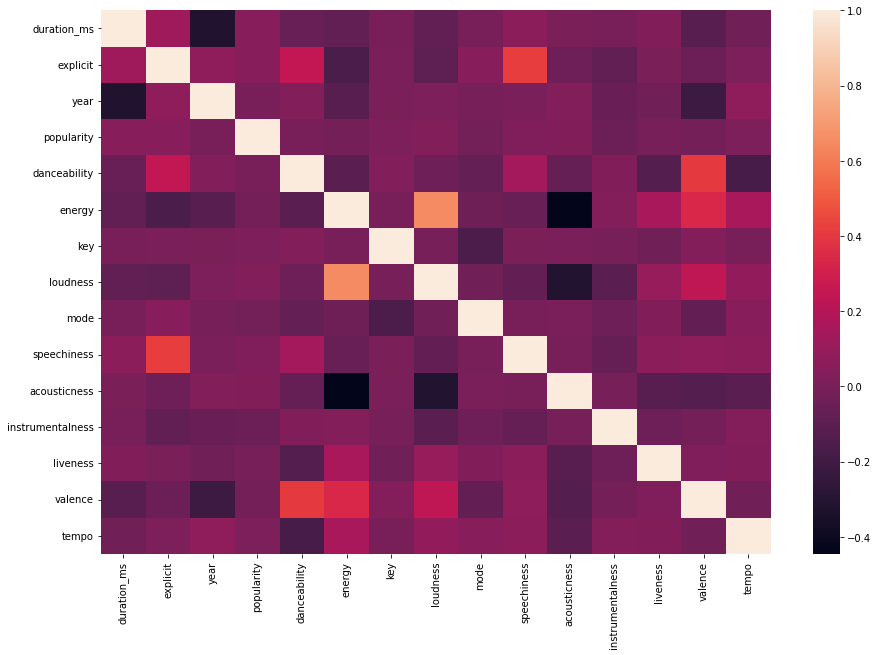

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

<div class="alert alert-block alert-info" style="font-size:16px; font-family:Helvetica;">
     📌 Only the energy and the loudness have a little correlation, others fields seems to be uncorrelated
</div>

### Eminem 
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/4a/Eminem_-_Concert_for_Valor_in_Washington%2C_D.C._Nov._11%2C_2014_%282%29_%28Cropped%29.jpg" width="300"/>
</div>